In [1087]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('salary_data.csv')

df.head(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [1088]:
df = df.drop_duplicates()
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1787 entries, 0 to 6631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1787 non-null   float64
 1   Gender               1787 non-null   object 
 2   Education Level      1787 non-null   object 
 3   Job Title            1787 non-null   object 
 4   Years of Experience  1787 non-null   float64
 5   Salary               1787 non-null   float64
dtypes: float64(3), object(3)
memory usage: 97.7+ KB


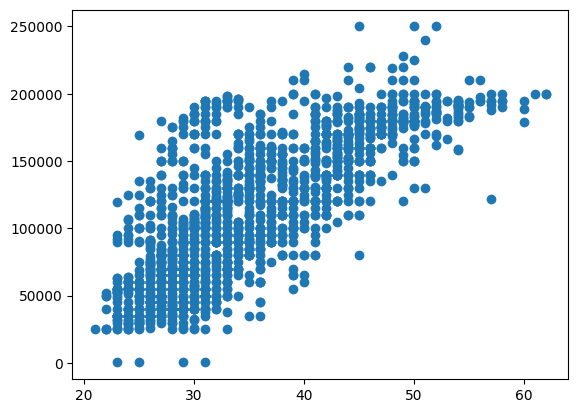

In [1089]:
plt.scatter(df['Age'], df['Salary'])
plt.show()

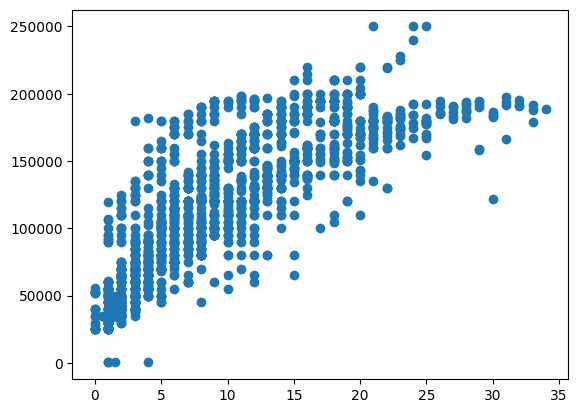

In [1090]:
plt.scatter(df['Years of Experience'], df['Salary'])
plt.show()

In [1091]:
df['Job Title'].unique(), len(df['Job Title'].unique())
# Job title feature has a lot features therefore, we need to drop that column for linear regression

(array(['Software Engineer', 'Data Analyst', 'Senior Manager',
        'Sales Associate', 'Director', 'Marketing Analyst',
        'Product Manager', 'Sales Manager', 'Marketing Coordinator',
        'Senior Scientist', 'Software Developer', 'HR Manager',
        'Financial Analyst', 'Project Manager', 'Customer Service Rep',
        'Operations Manager', 'Marketing Manager', 'Senior Engineer',
        'Data Entry Clerk', 'Sales Director', 'Business Analyst',
        'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
        'Social Media Specialist', 'Software Manager', 'Junior Developer',
        'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
        'Data Scientist', 'Marketing Specialist', 'Technical Writer',
        'HR Generalist', 'Project Engineer', 'Customer Success Rep',
        'Sales Executive', 'UX Designer', 'Operations Director',
        'Network Engineer', 'Administrative Assistant',
        'Strategy Consultant', 'Copywriter', 'Account M

In [1092]:
df['Education Level'].unique(), len(df['Education Level'].unique())

(array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
        "Master's Degree", 'High School', 'phD'], dtype=object),
 7)

In [1093]:
# a few category in the feature are the duplicate of another, needed to clean them

mapping = {
    "Bachelor's Degree" : "Bachelor's",
    "phD": "PhD",
    "Master's Degree" : "Master's"

}
df['Education Level'] = df['Education Level'].replace(mapping)

df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', 'High School'], dtype=object)

In [1094]:
# Gender, education level and job title are categorical features, encoding needed.

# Label encoding used for binary features
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# One-hot encoding used for multi-class features
df = pd.get_dummies(df, columns=['Education Level'])
df

,Age,Gender,Job Title,Years of Experience,Salary,Education Level_Bachelor's,Education Level_High School,Education Level_Master's,Education Level_PhD
0,32.0,1,Software Engineer,5.0,90000.0,True,False,False,False
1,28.0,0,Data Analyst,3.0,65000.0,False,False,True,False
2,45.0,1,Senior Manager,15.0,150000.0,False,False,False,True
3,36.0,0,Sales Associate,7.0,60000.0,True,False,False,False
4,52.0,1,Director,20.0,200000.0,False,False,True,False
...,...,...,...,...,...,...,...,...,...
6623,43.0,0,Digital Marketing Manager,15.0,150000.0,False,False,True,False
6624,27.0,1,Sales Manager,2.0,40000.0,False,True,False,False
6625,33.0,0,Director of Marketing,8.0,80000.0,True,False,False,False
6628,37.0,1,Sales Director,7.0,90000.0,True,False,False,False


In [1095]:
X = df.drop(columns=['Salary', 'Job Title'])
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [1096]:
model = LinearRegression()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.7555547538841227

In [1097]:
model.coef_

array([  -281.93947522,   6200.45565781,   5458.21793339,  -3263.63974481,
       -31825.13855289,  13039.31028654,  22049.46801116])